In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [11]:
# Load the Wine dataset
wine = load_wine()
df = wine.data
df

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [12]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [15]:
k = 5
MAX_ITER = 100
n = len(df)
m = 1.7

# initialize membership matrix
def initialize_membership(n, k):
    membership = np.random.rand(n, k)
    # Normalize the membership values for each data point
    for i in range(n):
        membership[i] /= np.sum(membership[i])
    return membership

# calculate cluster centers
def calculate_centers(df, membership, m):
    centers = np.zeros((k, df.shape[1]))
    for j in range(k):
        numerator = np.sum([membership[i, j]**m * df[i] for i in range(n)], axis=0)
        denominator = np.sum([membership[i, j]**m for i in range(n)])
        centers[j] = numerator / denominator
    return centers

# update membership values
def update_membership(df, centers, m):
    new_membership = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            dist = np.linalg.norm(df[i] - centers[j])
            if dist == 0:
                new_membership[i, j] = 1
                new_membership[i, [x for x in range(k) if x != j]] = 0
            else:
                for c in range(k):
                    dist_c = np.linalg.norm(df[i] - centers[c])
                    if dist_c == 0:
                        new_membership[i, c] = 1
                        new_membership[i, [x for x in range(k) if x != c]] = 0
                        break
                    else:
                        new_membership[i, j] = (1 / dist)**(2/(m-1)) / np.sum([(1 / np.linalg.norm(df[i] - centers[c]))**(2/(m-1)) for c in range(k)])
    return new_membership

# initialize cluster centers at the origin
def initialize_at_origin(k, df):
    centers = np.zeros((k, df.shape[1]))
    return centers

# initialize cluster centers at random locations within a Gaussian distribution
def initialize_at_gaussian(k, df):
    centers = np.random.normal(loc=0, scale=1, size=(k, df.shape[1]))
    return centers

# initialize cluster centers at random vectors chosen from the data
def initialize_at_data(k, df):
    indices = np.random.choice(df.shape[0], size=k, replace=False)
    centers = df[indices]
    return centers

# Fuzzy C-Means
def fuzzy_c_means(df, k, m, MAX_ITER, init_func):
    membership = initialize_membership(len(df), k)
    centers = init_func(k, df)

    for _ in range(MAX_ITER):
        new_centers = calculate_centers(df, membership, m)
        new_membership = update_membership(df, new_centers, m)

        # Check for convergence
        if np.allclose(membership, new_membership):
            break
        membership = new_membership
        centers = new_centers

    return membership, centers

def plot_data(df, membership, centers):
    plt.figure(figsize=(10, 8))
    for i in range(len(df)):
        cluster = np.argmax(membership[i])
        plt.scatter(df[i, 0], df[i, 1], c=['r', 'g', 'b', 'y', 'c'][cluster])
    cluster_centers = plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='*', s=200)

    plt.legend([cluster_centers], ['Cluster Centers'], loc='upper right')

    plt.title('Fuzzy C-Means Clustering')
    plt.show()

def calculate_silhouette(df, membership):
    cluster_labels = np.argmax(membership, axis=1)
    silhouette = silhouette_score(df, cluster_labels)
    return silhouette

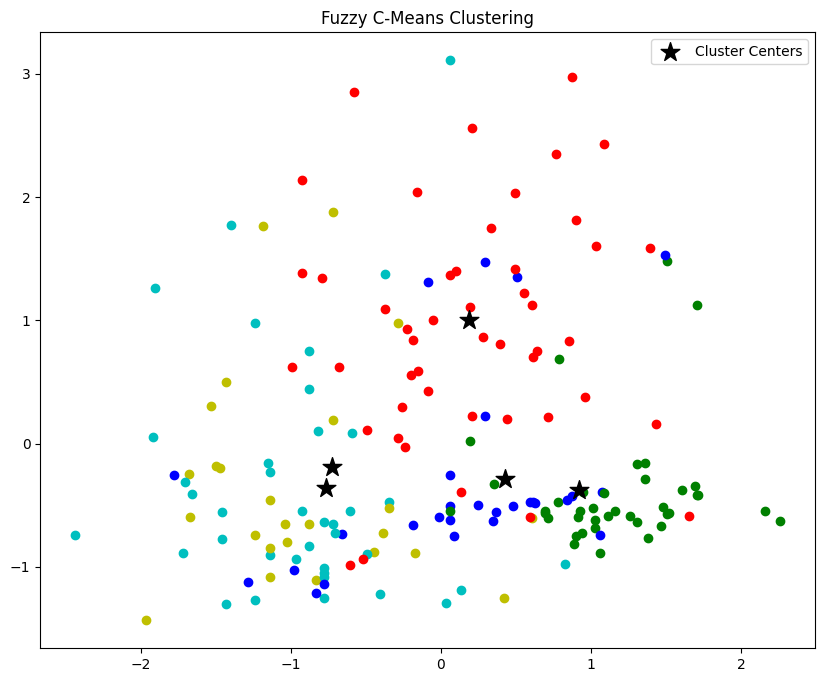

Silhouette Score (Origin): 0.17138637906751952


In [16]:
# Case 1: Initialize at the origin
membership_origin, centers_origin = fuzzy_c_means(df, k, m, MAX_ITER, initialize_at_origin)
plot_data(df, membership_origin, centers_origin)
print(f"Silhouette Score (Origin): {calculate_silhouette(df, membership_origin)}")

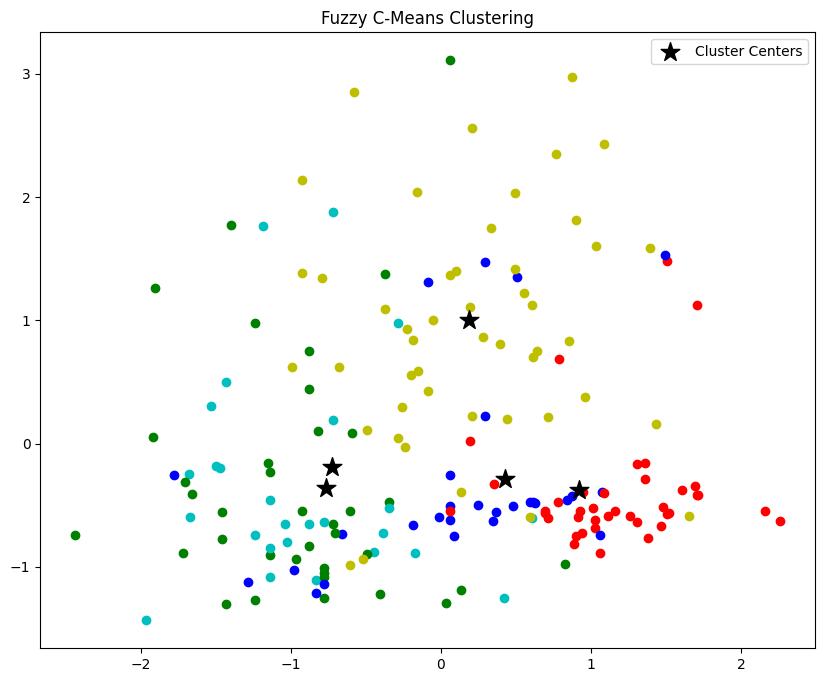

Silhouette Score (Gaussian): 0.17112052911594033


In [17]:
# Case 2: Initialize at random Gaussian locations
membership_gaussian, centers_gaussian = fuzzy_c_means(df, k, m, MAX_ITER, initialize_at_gaussian)
plot_data(df, membership_gaussian, centers_gaussian)
print(f"Silhouette Score (Gaussian): {calculate_silhouette(df, membership_gaussian)}")

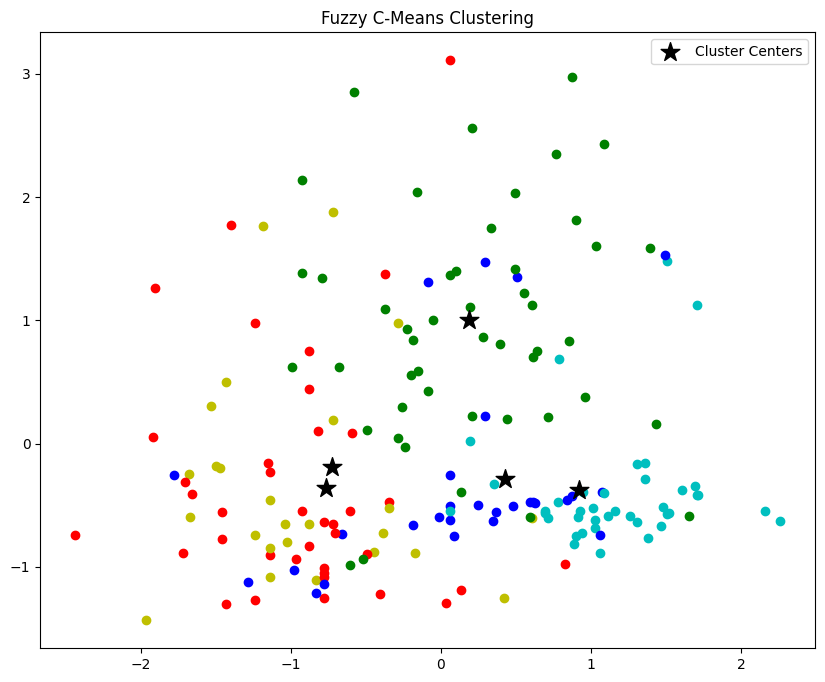

Silhouette Score (Data Points): 0.17138637906751952


In [18]:
# Case 3: Initialize at random data points
membership_data, centers_data = fuzzy_c_means(df, k, m, MAX_ITER, initialize_at_data)
plot_data(df, membership_data, centers_data)
print(f"Silhouette Score (Data Points): {calculate_silhouette(df, membership_data)}")